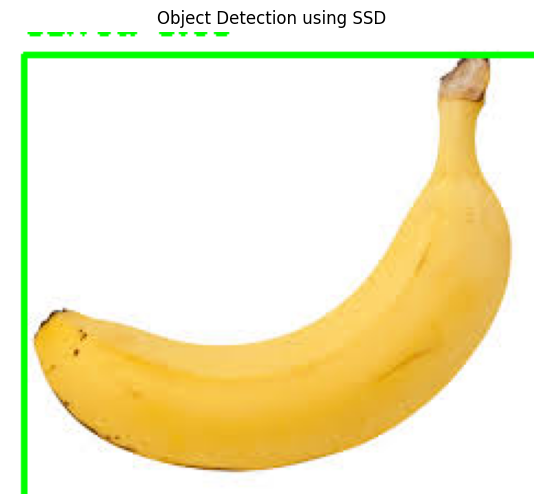

In [7]:
import torch
import torchvision
import cv2
import numpy as np
import matplotlib.pyplot as plt

model = torchvision.models.detection.ssd300_vgg16(pretrained=True)
model.eval()
COCO_LABELS = ["__background__", "person", "bicycle", "car", "motorcycle", "airplane", "bus",
               "train", "truck", "boat", "traffic light", "fire hydrant", "stop sign",
               "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow",
               "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", "handbag",
               "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite",
               "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket",
               "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
               "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza",
               "donut", "cake", "chair", "couch", "potted plant", "bed", "dining table",
               "toilet", "TV", "laptop", "mouse", "remote", "keyboard", "cell phone",
               "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock",
               "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]

image_path = "banana.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_resized = cv2.resize(image_rgb, (300, 300))
image_tensor = torch.tensor(image_resized / 255.0, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)
with torch.no_grad():
    predictions = model(image_tensor)

boxes = predictions[0]["boxes"].numpy()
labels = predictions[0]["labels"].numpy()
scores = predictions[0]["scores"].numpy()

for box, label, score in zip(boxes, labels, scores):
    if score > 0.5:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        text = f"{COCO_LABELS[label]}: {score:.2f}"
        cv2.putText(image, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Object Detection using SSD")
plt.show()
